In [28]:
import matplotlib.pyplot as plt
import numpy as np
import re
import ast 
import torch

In [29]:
def test_val_extractor(file_name):    
    # get accuracy from sparsity.txt
    test_val_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 0:
                line = ast.literal_eval(line)
                test_val_accumulator = line
                
    # return list of test accuracy 
    return test_val_accumulator

In [30]:
def sparsity_val_extractor(file_name):
    sparsity_accumulator = list()
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 1:
                # extract certain format like X.XXX
                sparsity_list = re.findall("\d+\.\d+", line)
                # change to str type to use 'replace'
                sparsity_list = str(sparsity_list)
                # replace ' to none 
                sparsity_list = sparsity_list.replace("'", "")
                # use ast.literal_eval to change from str to list type
                sparsity_list = ast.literal_eval(sparsity_list)
                
    # return list of sparsity            
    return sparsity_list

In [31]:
def selectivity_val_extractor(file_name):
    selectivity_average = 0
    selectivity_std = 0
    with open(file_name) as fi:
        for i, line in enumerate(fi):
            if i == 2:
                selectivity_average = ast.literal_eval(line)
            if i == 3:
                selectivity_std = ast.literal_eval(line)
    return selectivity_average, selectivity_std

In [32]:
def all_plotter(sorted_test_acc_list, sorted_sparsity_list, sorted_selectivity_average_list, nonsorted_test_acc_list, nonsorted_sparsity_list, nonsorted_selectivity_average_list, location='best'):
    fig, ax = plt.subplots(figsize=(20, 15))
    
    ax.plot(np.linspace(0.0, 300.0, num=300), sorted_test_acc_list, label='sorted test accuracy', c='royalblue')
    ax.plot(np.linspace(0.0, 300.0, num=300), sorted_sparsity_list, label='sorted sparsity', c='cornflowerblue')
    ax.plot(np.linspace(0.0, 300.0, num=300), sorted_selectivity_average_list, label='sorted selectivity', c='lightsteelblue')
    
    ax.plot(np.linspace(0.0, 300.0, num=300), nonsorted_test_acc_list, label='original test accuracy', c='indigo')
    ax.plot(np.linspace(0.0, 300.0, num=300), nonsorted_sparsity_list, label='original sparsity', c='darkorchid')
    ax.plot(np.linspace(0.0, 300.0, num=300), nonsorted_selectivity_average_list, label='original selectivity', c='violet')

    ax.set_ylim([-0.2,1.2])
    ax.legend(loc=location)
    plt.show()

# Graph format

In [33]:
def plotter(optimizer_name, flag=False):
    sorted_test_vals  = test_val_extractor(f'sorted_sparsity_selectivity_{optimizer_name}.txt')
    sorted_sparsities = sparsity_val_extractor(f'sorted_sparsity_selectivity_{optimizer_name}.txt')
    sorted_selectivity_average, sorted_selectivity_std = selectivity_val_extractor(f"sorted_sparsity_selectivity_{optimizer_name}.txt")

    non_sorted_test_vals  = test_val_extractor(f'unsorted_sparsity_selectivity_{optimizer_name}.txt')
    non_sorted_sparsities = sparsity_val_extractor(f'unsorted_sparsity_selectivity_{optimizer_name}.txt')
    non_sorted_selectivity_average, non_sorted_selectivity_std = selectivity_val_extractor(f"unsorted_sparsity_selectivity_{optimizer_name}.txt")
    
    if flag==False:
        all_plotter(sorted_test_vals, sorted_sparsities, sorted_selectivity_average, non_sorted_test_vals, non_sorted_sparsities, non_sorted_selectivity_average)
    else:
        return sorted_test_vals, sorted_sparsities, sorted_selectivity_average, sorted_selectivity_std, non_sorted_test_vals, non_sorted_sparsities, non_sorted_selectivity_average, non_sorted_selectivity_std 

In [34]:
sorted_acc_sgd,     sorted_spar_sgd,     sorted_selec_avg_sgd,     sorted_selec_std_sgd,     ori_acc_sgd,     ori_spar_sgd,     ori_selec_avg_sgd,     ori_selec_std_sgd     = plotter('SGD', flag=True)
sorted_acc_adagrad, sorted_spar_adagrad, sorted_selec_avg_adagrad, sorted_selec_std_adagrad, ori_acc_adagrad, ori_spar_adagrad, ori_selec_avg_adagrad, ori_selec_std_adagrad = plotter('Adagrad', flag=True)
sorted_acc_adadelta, sorted_spar_adadelta, sorted_selec_avg_adadelta, sorted_selec_std_adadelta, ori_acc_adadelta, ori_spar_adadelta, ori_selec_avg_adadelta, ori_selec_std_adadelta = plotter('Adadelta', flag=True)
sorted_acc_adam,    sorted_spar_adam,    sorted_selec_avg_adam,    sorted_selec_std_adam,    ori_acc_adam,    ori_spar_adam,    ori_selec_avg_adam,    ori_selec_std_adam    = plotter('Adam', flag=True)

# Plot all in one 

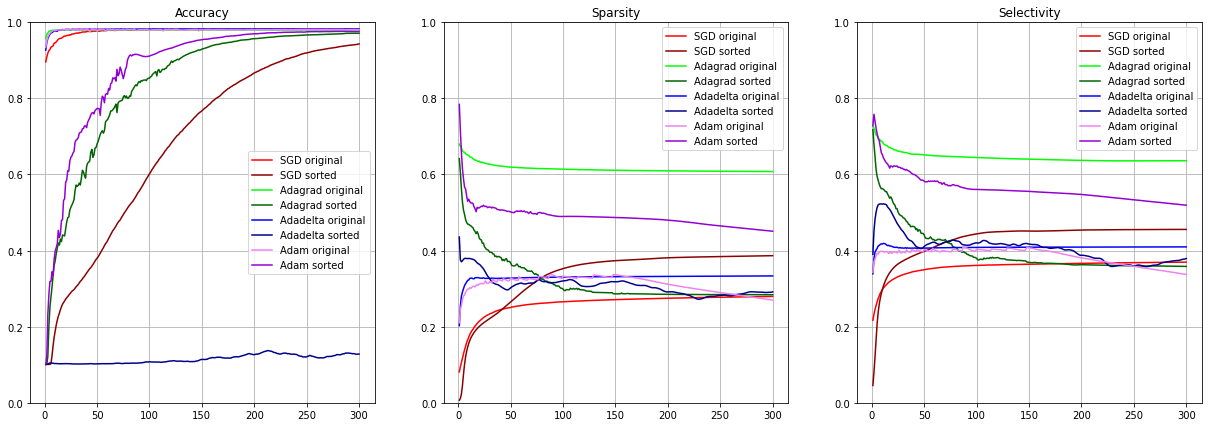

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21,7))

# accuracy plot 
ax1.plot(np.linspace(1, 300, 300), ori_acc_sgd, label='SGD original', c='red')
ax1.plot(np.linspace(1, 300, 300), sorted_acc_sgd, label='SGD sorted', c='darkred')

ax1.plot(np.linspace(1, 300, 300), ori_acc_adagrad, label='Adagrad original', c='lime')
ax1.plot(np.linspace(1, 300, 300), sorted_acc_adagrad, label='Adagrad sorted', c='darkgreen')

ax1.plot(np.linspace(1, 300, 300), ori_acc_adadelta, label='Adadelta original', c='blue')
ax1.plot(np.linspace(1, 300, 300), sorted_acc_adadelta, label='Adadelta sorted', c='darkblue')

ax1.plot(np.linspace(1, 300, 300), ori_acc_adam, label='Adam original', c='violet')
ax1.plot(np.linspace(1, 300, 300), sorted_acc_adam, label='Adam sorted', c='darkviolet')
ax1.set_ylim([0, 1.0])

ax1.set_title('Accuracy')
ax1.grid()
ax1.legend(loc='best')

# sparsity colour 
ax2.plot(np.linspace(1, 300, 300), ori_spar_sgd, label='SGD original', c='red')
ax2.plot(np.linspace(1, 300, 300), sorted_spar_sgd, label='SGD sorted', c='darkred')

ax2.plot(np.linspace(1, 300, 300), ori_spar_adagrad, label='Adagrad original', c='lime')
ax2.plot(np.linspace(1, 300, 300), sorted_spar_adagrad, label='Adagrad sorted', c='darkgreen')

ax2.plot(np.linspace(1, 300, 300), ori_spar_adadelta, label='Adadelta original', c='blue')
ax2.plot(np.linspace(1, 300, 300), sorted_spar_adadelta, label='Adadelta sorted', c='darkblue')

ax2.plot(np.linspace(1, 300, 300), ori_spar_adam, label='Adam original', c='violet')
ax2.plot(np.linspace(1, 300, 300), sorted_spar_adam, label='Adam sorted', c='darkviolet')
ax2.set_ylim([0, 1])

ax2.set_title('Sparsity')
ax2.grid()
ax2.legend(loc='best')


# selectivity colour 
ax3.plot(np.linspace(1, 300, 300), ori_selec_avg_sgd, label='SGD original', c='red')
ax3.plot(np.linspace(1, 300, 300), sorted_selec_avg_sgd, label='SGD sorted', c='darkred')

ax3.plot(np.linspace(1, 300, 300), ori_selec_avg_adagrad, label='Adagrad original', c='lime')
ax3.plot(np.linspace(1, 300, 300), sorted_selec_avg_adagrad, label='Adagrad sorted', c='darkgreen')

ax3.plot(np.linspace(1, 300, 300), ori_selec_avg_adadelta, label='Adadelta original', c='blue')
ax3.plot(np.linspace(1, 300, 300), sorted_selec_avg_adadelta, label='Adadelta sorted', c='darkblue')

ax3.plot(np.linspace(1, 300, 300), ori_selec_avg_adam, label='Adam original', c='violet')
ax3.plot(np.linspace(1, 300, 300), sorted_selec_avg_adam, label='Adam sorted', c='darkviolet')
ax3.set_ylim([0, 1])

ax3.set_title('Selectivity')
ax3.grid()
ax3.legend(loc='best')

plt.show()

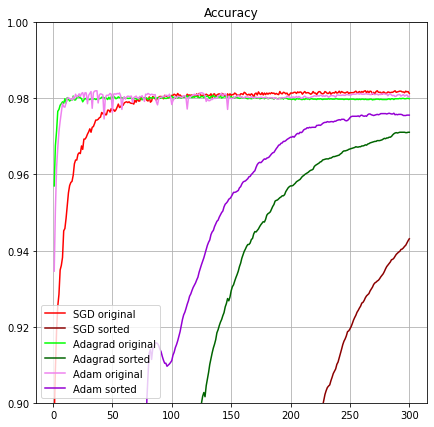

In [36]:
fig, (ax1) = plt.subplots(figsize=(7,7))

# accuracy plot 
ax1.plot(np.linspace(1, 300, 300), ori_acc_sgd, label='SGD original', c='red')
ax1.plot(np.linspace(1, 300, 300), sorted_acc_sgd, label='SGD sorted', c='darkred')

ax1.plot(np.linspace(1, 300, 300), ori_acc_adagrad, label='Adagrad original', c='lime')
ax1.plot(np.linspace(1, 300, 300), sorted_acc_adagrad, label='Adagrad sorted', c='darkgreen')

ax1.plot(np.linspace(1, 300, 300), ori_acc_adam, label='Adam original', c='violet')
ax1.plot(np.linspace(1, 300, 300), sorted_acc_adam, label='Adam sorted', c='darkviolet')
ax1.set_ylim([0.9, 1.0])

ax1.set_title('Accuracy')
ax1.grid()
ax1.legend(loc='best')

# Accuracy x Sparsity (or Selectivity)

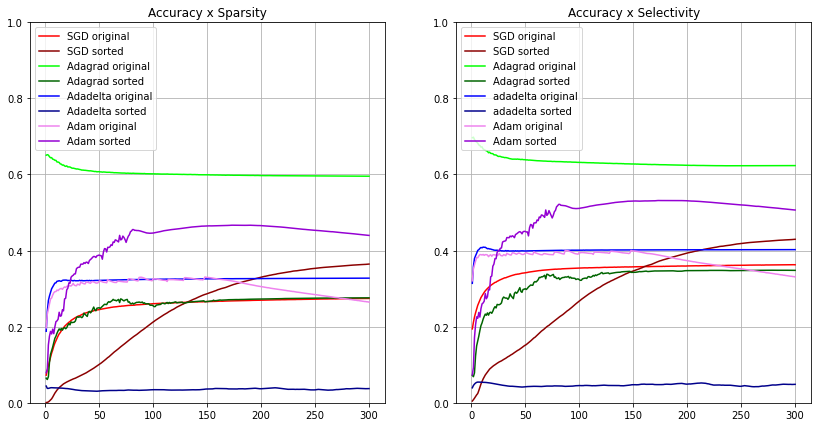

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

# Accuracy x Sparsity 
ax1.plot(np.linspace(1, 300, 300), [a * b for a, b in zip(ori_acc_sgd, ori_spar_sgd)], 
         label='SGD original', c='red')
ax1.plot(np.linspace(1, 300, 300), [a * b for a, b in zip(sorted_acc_sgd, sorted_spar_sgd)], 
         label='SGD sorted', c='darkred')

ax1.plot(np.linspace(1, 300, 300), [a * b for a, b in zip(ori_acc_adagrad, ori_spar_adagrad)], 
         label='Adagrad original', c='lime')
ax1.plot(np.linspace(1, 300, 300), [a * b for a, b in zip(sorted_acc_adagrad, sorted_spar_adagrad)], 
         label='Adagrad sorted', c='darkgreen')

ax1.plot(np.linspace(1, 300, 300), [a * b for a, b in zip(ori_acc_adadelta, ori_spar_adadelta)], 
         label='Adadelta original', c='blue')
ax1.plot(np.linspace(1, 300, 300), [a * b for a, b in zip(sorted_acc_adadelta, sorted_spar_adadelta)], 
         label='Adadelta sorted', c='darkblue')

ax1.plot(np.linspace(1, 300, 300), [a * b for a, b in zip(ori_acc_adam, ori_spar_adam)], 
         label='Adam original', c='violet')
ax1.plot(np.linspace(1, 300, 300), [a * b for a, b in zip(sorted_acc_adam, sorted_spar_adam)], 
         label='Adam sorted', c='darkviolet')
ax1.set_ylim([0, 1.0])

ax1.set_title('Accuracy x Sparsity')
ax1.grid()
ax1.legend(loc='upper left')

# Accuracy x Selectivity   
ax2.plot(np.linspace(1, 300, 300), [a * b for a, b in zip(ori_acc_sgd, ori_selec_avg_sgd)], 
         label='SGD original', c='red')
ax2.plot(np.linspace(1, 300, 300), [a * b for a, b in zip(sorted_acc_sgd, sorted_selec_avg_sgd)], 
         label='SGD sorted', c='darkred')

ax2.plot(np.linspace(1, 300, 300), [a * b for a, b in zip(ori_acc_adagrad, ori_selec_avg_adagrad)], 
         label='Adagrad original', c='lime')
ax2.plot(np.linspace(1, 300, 300), [a * b for a, b in zip(sorted_acc_adagrad, sorted_selec_avg_adagrad)], 
         label='Adagrad sorted', c='darkgreen')

ax2.plot(np.linspace(1, 300, 300), [a * b for a, b in zip(ori_acc_adadelta, ori_selec_avg_adadelta)], 
         label='adadelta original', c='blue')
ax2.plot(np.linspace(1, 300, 300), [a * b for a, b in zip(sorted_acc_adadelta, sorted_selec_avg_adadelta)], 
         label='adadelta sorted', c='darkblue')

ax2.plot(np.linspace(1, 300, 300), [a * b for a, b in zip(ori_acc_adam, ori_selec_avg_adam)], 
         label='Adam original', c='violet')
ax2.plot(np.linspace(1, 300, 300), [a * b for a, b in zip(sorted_acc_adam, sorted_selec_avg_adam)], 
         label='Adam sorted', c='darkviolet')
ax2.set_ylim([0, 1])

ax2.set_title('Accuracy x Selectivity')
ax2.grid()
ax2.legend(loc='upper left')

plt.show()

# subplots

In [38]:
def subplots(ori_sgd, ori_adagrad, ori_adam,
             sorted_sgd, sorted_adagrad, sorted_adam):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))
    
    ax1.plot(np.linspace(0, 100, 100), ori_sgd, label='SGD', c='red')
    ax1.plot(np.linspace(0, 100, 100), ori_adagrad, label='Adagrad', c='blue')
    ax1.plot(np.linspace(0, 100, 100), ori_adam, label='Adam', c='violet')
    ax1.set_ylim([-0.1,1.1])
    ax1.grid()
    ax1.legend(loc='best')

    ax2.plot(np.linspace(0, 100, 100), sorted_sgd, label='sorted SGD', c='red')
    ax2.plot(np.linspace(0, 100, 100), sorted_adagrad, label='sorted Adagrad', c='blue')
    ax2.plot(np.linspace(0, 100, 100), sorted_adam, label='sorted Adam', c='violet')
    ax2.set_ylim([-0.1,1.1])
    ax2.grid()
    ax2.legend(loc='best')
    
    
    plt.show()

# Compare

In [39]:
def compare(optimizer_name, flag=True):
    print(f'\n==============={optimizer_name}===============')
    sorted_test_vals, sorted_sparsities, sorted_selectivity_average, sorted_selectivity_std, non_sorted_test_vals, non_sorted_sparsities, non_sorted_selectivity_average, non_sorted_selectivity_std = plotter(optimizer_name, flag=True)
    print(f"{optimizer_name} non_sorted(original): Test acc={non_sorted_test_vals[-1]:.3f}, Spar={non_sorted_sparsities[-1]:.3f}, Selec avg={non_sorted_selectivity_average[-1]:.3f}, Selec std={non_sorted_selectivity_std[-1]:.3f}")
    print(f"{optimizer_name} sorted: Test acc={sorted_test_vals[-1]:.3f}, Spar={sorted_sparsities[-1]:.3f}, Selec avg={sorted_selectivity_average[-1]:.3f}, Selec std={sorted_selectivity_std[-1]:.3f}")
    print()
    print("test deviation: sorted - non_sorted(original):", sorted_test_vals[-1] - non_sorted_test_vals[-1])
    print("sparsity deviation: sorted - non_sorted(original):", sorted_sparsities[-1] - non_sorted_sparsities[-1])
    print("selectivity deviation: sorted - non_sorted(original):", sorted_selectivity_average[-1] - non_sorted_selectivity_average[-1])
    print()
    print("test % difference: sorted / non_sorted(original):", (sorted_test_vals[-1] / non_sorted_test_vals[-1]) * 100)
    print("sparsity % difference: sorted / non_sorted(original):", (sorted_sparsities[-1] / non_sorted_sparsities[-1]) * 100)
    print("selectivity % difference: sorted / non_sorted(original):", (sorted_selectivity_average[-1] / non_sorted_selectivity_average[-1]) * 100)


In [40]:
# 100 epochs

compare('SGD')
# compare('Adadelta')
compare('Adagrad')
compare('Adam')


===============SGD===============
SGD non_sorted(original): Test acc=0.981, Spar=0.280, Selec avg=0.370, Selec std=0.173
SGD sorted: Test acc=0.943, Spar=0.387, Selec avg=0.456, Selec std=0.137

test deviation: sorted - non_sorted(original): -0.0381999999999999
sparsity deviation: sorted - non_sorted(original): 0.10710090398788452
selectivity deviation: sorted - non_sorted(original): 0.08602033348321869

test % difference: sorted / non_sorted(original): 96.1072047284215
sparsity % difference: sorted / non_sorted(original): 138.3182823664739
selectivity % difference: sorted / non_sorted(original): 123.27157662216055

===============Adagrad===============
Adagrad non_sorted(original): Test acc=0.980, Spar=0.608, Selec avg=0.636, Selec std=0.178
Adagrad sorted: Test acc=0.971, Spar=0.284, Selec avg=0.358, Selec std=0.276

test deviation: sorted - non_sorted(original): -0.00880000000000003
sparsity deviation: sorted - non_sorted(original): -0.3236819803714752
selectivity deviation: sorted

# Subplot - test acc

ValueError: x and y must have same first dimension, but have shapes (100,) and (300,)

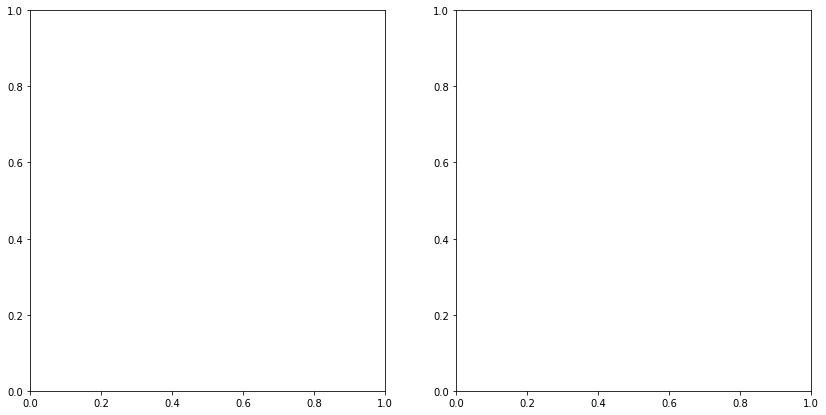

In [41]:
subplots(ori_acc_sgd, ori_acc_adagrad, ori_acc_adam, sorted_acc_sgd, sorted_acc_adagrad, sorted_acc_adam)

# Subplot - sparsity

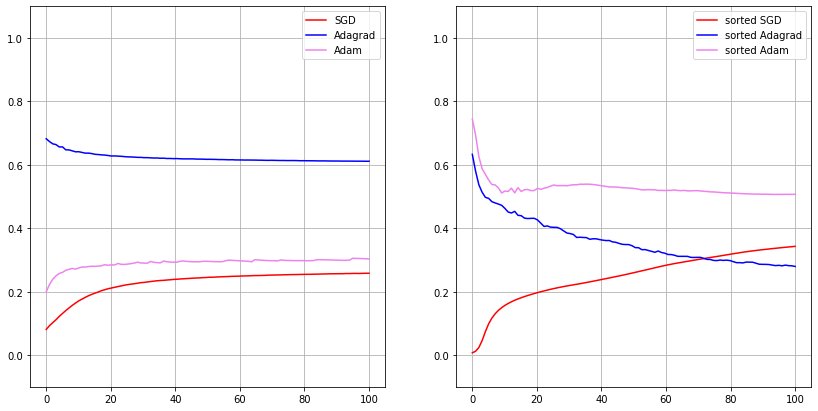

In [21]:
subplots(ori_spar_sgd, ori_spar_adagrad, ori_spar_adam, sorted_spar_sgd, sorted_spar_adagrad, sorted_spar_adam)

# Subplot - selectivity

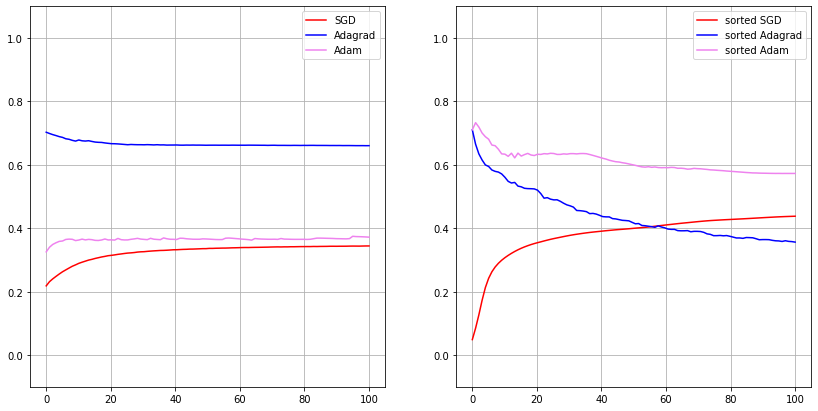

In [22]:
subplots(ori_selec_avg_sgd, ori_selec_avg_adagrad, ori_selec_avg_adam, sorted_selec_avg_sgd, sorted_selec_avg_adagrad, sorted_selec_avg_adam)

# SGD

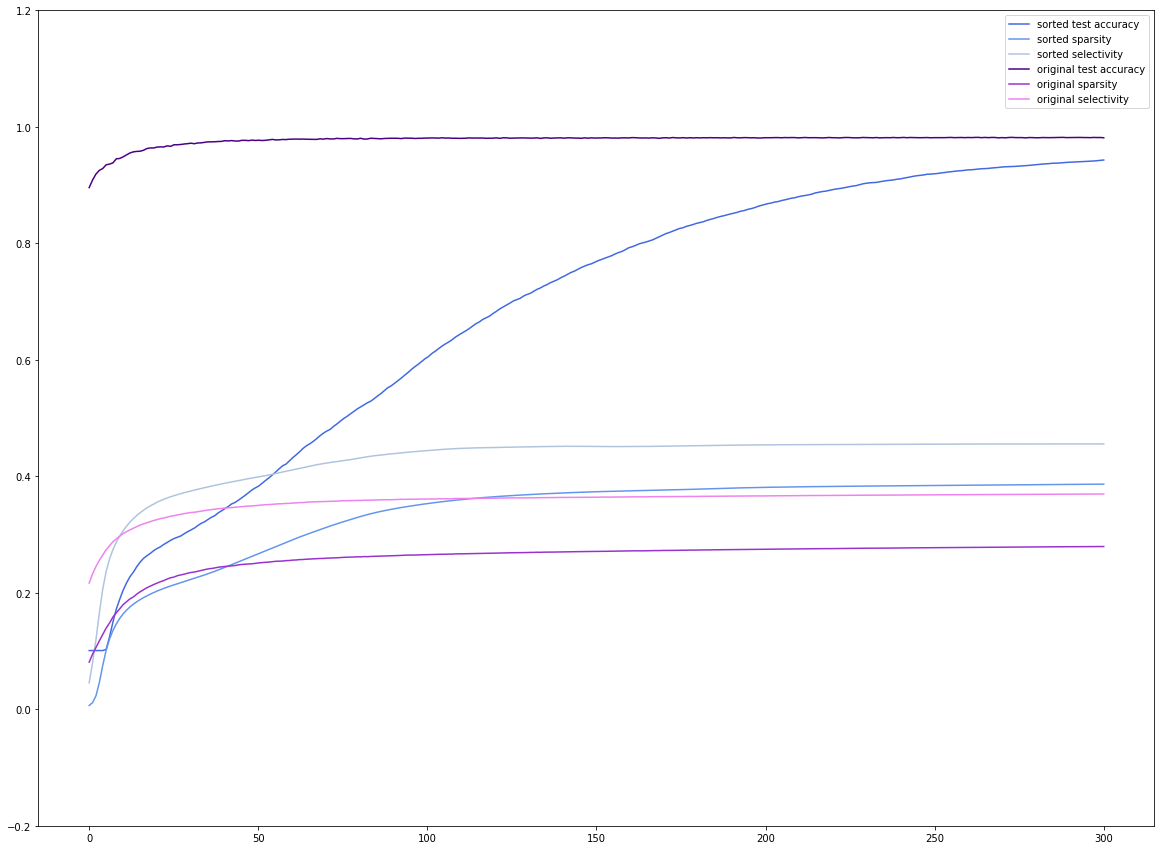

In [42]:
plotter('SGD')

# Adagard

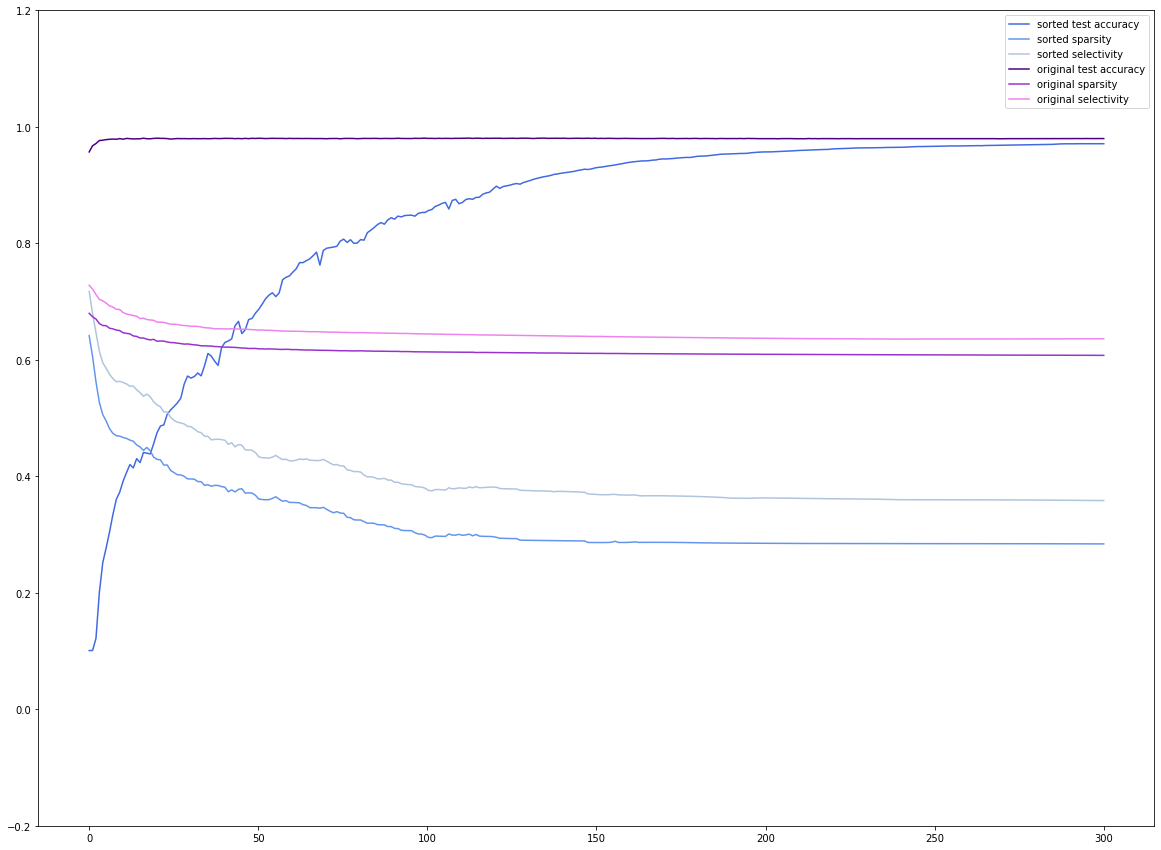

In [43]:
plotter('Adagrad')

# Adam

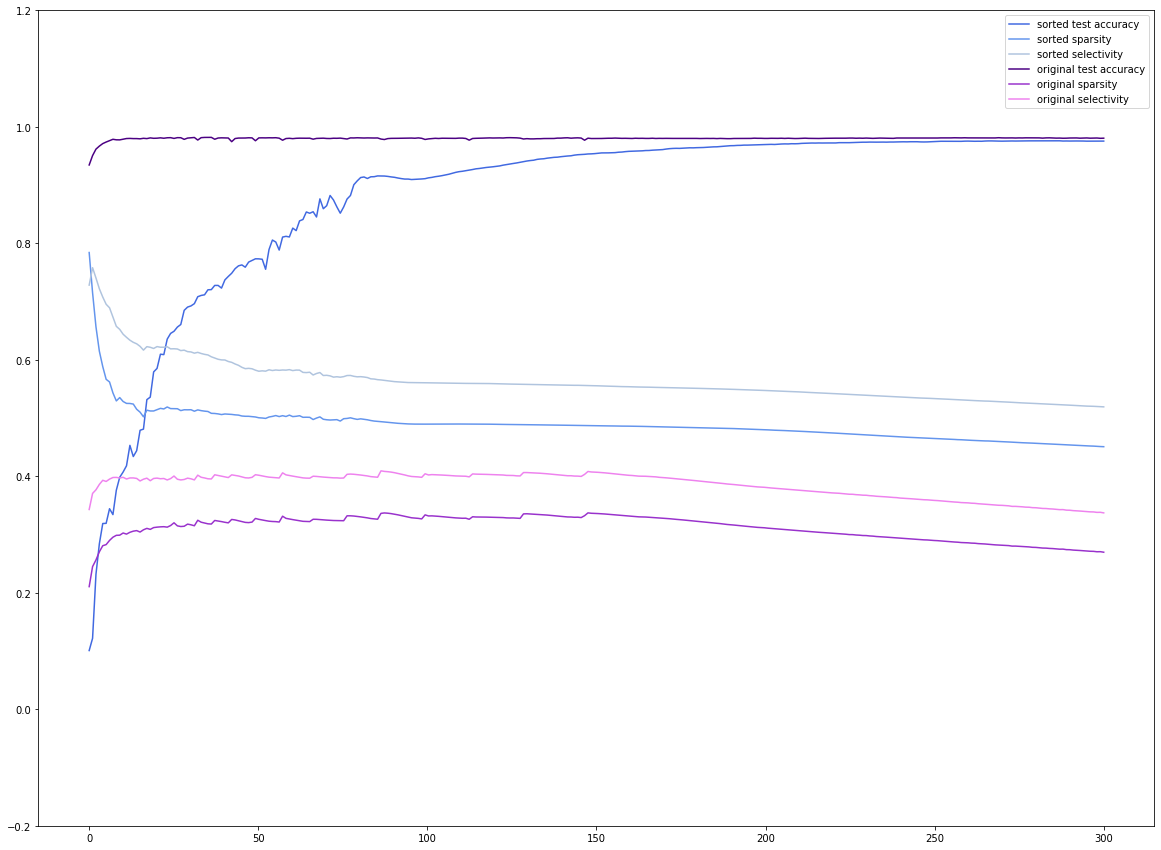

In [44]:
plotter('Adam')